In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Ruchita/Downloads/Datascience/50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df.shape

(50, 5)

In [8]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

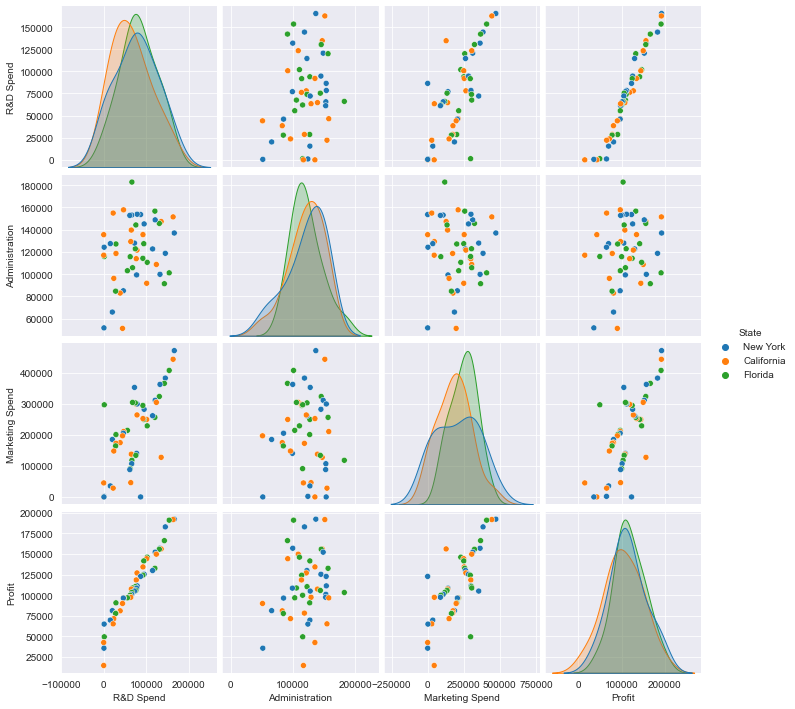

In [10]:
# Visualize the data

sns.set_style(style='darkgrid')
sns.pairplot(df, hue='State')

In [12]:
# This is a categorical feature with numaric values. If I give it to the model as it is, the madel will treat it as continues
# variable , ie. 2 > 1.

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['State']=le.fit_transform(df['State'])

In [13]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [14]:
x= df[['R&D Spend', 'Administration', 'Marketing Spend']]
y= df['Profit']

In [15]:
#  Train test model
# train test is a method to measure the accuracy of model
# it is called train test because you split the data set into two stes: a training set & a testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [16]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Train the models on training data
model_li=LinearRegression().fit(x_train, y_train)
model_la=Lasso(alpha=1).fit(x_train, y_train)
model_ri=Ridge(alpha=1).fit(x_train, y_train)
model_el=ElasticNet().fit(x_train, y_train)

In [17]:
# Check accuracy of models

li=model_li.predict(x_test)
la=model_la.predict(x_test)
ri=model_ri.predict(x_test)
el=model_el.predict(x_test)

print('LI_Score=',model_li.score(x_train, y_train))
print('LA_Score=',model_la.score(x_train, y_train))
print('RI_Score=',model_ri.score(x_train, y_train))
print('EL_Score=',model_el.score(x_train, y_train))

LI_Score= 0.9416223802328486
LA_Score= 0.9416223802328486
RI_Score= 0.9416223802328485
EL_Score= 0.9416223802328486


In [18]:
# Check predicted value

print(li)

[158402.35830516 129509.91733962 110774.96538683 101860.24618536
 164309.49110991 115756.29816552 113985.24718424 189441.38725267
 117100.52514109  46581.51419023]
